<a href="https://colab.research.google.com/github/lorduwahz/Data-Science/blob/main/CHALLENGE___COMPARE_MACHINE_LEARNING_CLASSIFICATION_ALGORITHMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CHALLENGE --> CREATE SEVERAL SUPERVISED MACHINE LEARNING MODELS AND COMPARE THEIR SCORES

We start by creating a SVR model on California House Price Dataset then use helper function for comparing it results to that of Multiple Linear Regression (kitchen sink), Ridge Regression, Lasso Regression, and Elastic Net Regression.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/sample_data/california_housing_train.csv') # Load dataset

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
# Check our dataset for more insights
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
# Check to confirm we do not have any Null values that may alter the performances of our models
data.isnull().value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value
False      False     False               False        False           False       False       False          False                 17000
dtype: int64

In [5]:
data['median_income'].describe()

count    17000.000000
mean         3.883578
std          1.908157
min          0.499900
25%          2.566375
50%          3.544600
75%          4.767000
max         15.000100
Name: median_income, dtype: float64

In [6]:
# Preprocessing the features and target for standardisation.
from sklearn import preprocessing as pp

In [7]:
data[['longitude']] = pp.scale(data[['longitude']].astype('float64'))
data[['latitude']] = pp.scale(data[['latitude']].astype('float64'))
data[['housing_median_age']] = pp.scale(data[['housing_median_age']].astype('float64'))
data[['total_rooms']] = pp.scale(data[['total_rooms']].astype('float64'))
data[['total_bedrooms']] = pp.scale(data[['total_bedrooms']].astype('float64'))
data[['population']] = pp.scale(data[['population']].astype('float64'))
data[['households']] = pp.scale(data[['households']].astype('float64'))
data[['median_income']] = pp.scale(data[['median_income']].astype('float64'))
data[['median_house_value']] = pp.scale(data[['median_house_value']].astype('float64'))

In [8]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543,-1.210558
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483,-1.096745
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105,-1.048461
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600,-1.154514
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454,-1.222629


In [9]:
# Import the required libraries and modules for our models

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [10]:
# Creating the helper function that will help to automate the entire process.

def model (
    model_fn,
    target,
    features,
    dataset,
    show_plot_y=False
  ):

  X = dataset[features]
  y = dataset[target]

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model = model_fn(x_train, y_train)
  y_pred = model.predict(x_test)

  print(f'The training score for this model is: {(model.score(x_train, y_train) * 100).round(2)}%')
  print(f'The test score for this model is: {(r2_score(y_test, y_pred) * 100).round(2)}%')

  
  if show_plot_y == True:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    plt.plot(y_pred, label='Predicted values')
    plt.plot(y_test.values, label='Actual Values')
    
    plt.ylabel(target)

    plt.legend()
    plt.show()
  return {
            'training_score': model.score(x_train, y_train),
            'test_score': r2_score(y_test, y_pred)
           }   

# Note that we did not make provision for a scatter plot because we intend to use all the features in our dataset to predict house prices.

In [11]:
# This dictionary will hold all the model scores for comparison.
model_performance = {}

In [12]:
# The function to automatically compare and print each model results.

def compare_performance():
  for key in model_performance:
    print(f'Model type: {key}')
    print(f'Training score is {(model_performance[key]["training_score"] * 100).round(2)} %')
    print(f'Test score is {(model_performance[key]["test_score"] * 100).round(2)} %')
    print()

In [13]:
# The support vector regression model

def svr_algo (x_train, y_train, kernel='linear', epsilon=0.05, C=0.5):
  model = SVR(kernel=kernel, epsilon=epsilon, C=C)
  model.fit(x_train, y_train)

  return model

The training score for this model is: 62.25%
The test score for this model is: 64.93%


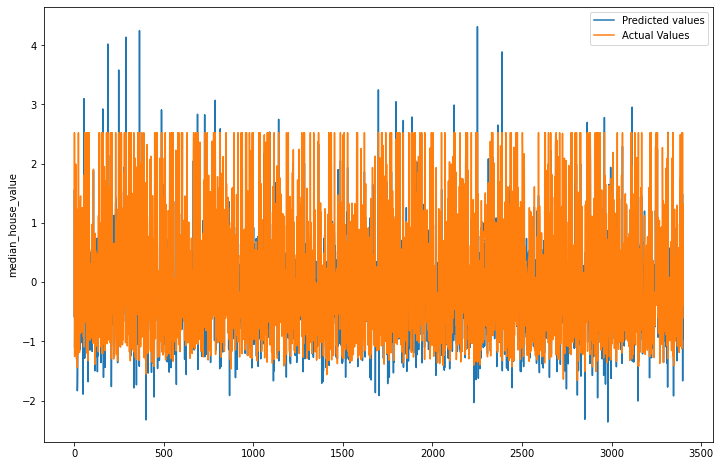

In [14]:
model_performance['support_vector_regression'] = model(
    svr_algo,
    'median_house_value',
    ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
    data,
    show_plot_y=True
)

In [15]:
# The Multiple linear regression model

def linear_reg_model(x_train, y_train):
    model = LinearRegression(normalize=True)
    model.fit(x_train, y_train)
    
    return model

The training score for this model is: 63.53%
The test score for this model is: 66.36%


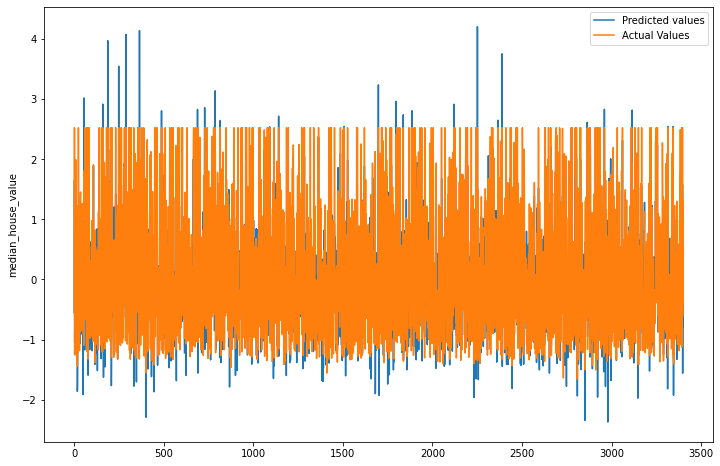

In [16]:
model_performance['multiple_linear_regression'] = model(
    linear_reg_model,
    'median_house_value',
    ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
    data,
    show_plot_y=True
)

In [17]:
# The LASSO regression model

def lasso_regression(x_train, y_train, alpha=0.1):
  model = Lasso(alpha=alpha)
  model.fit(x_train, y_train)

  return model

The training score for this model is: 48.53%
The test score for this model is: 50.52%


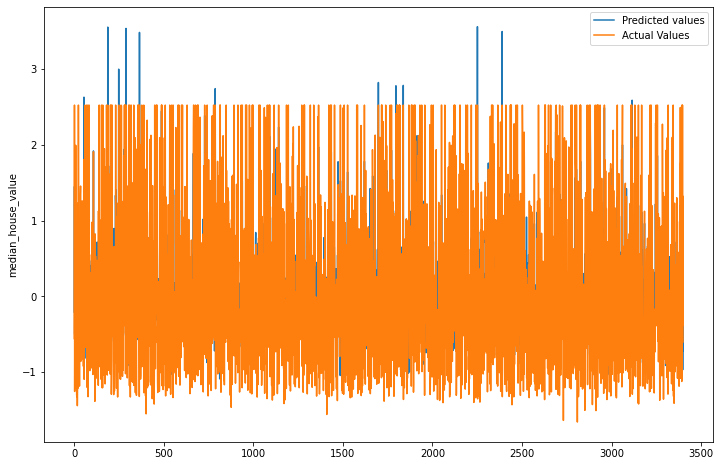

In [18]:
model_performance['lasso_regression'] = model(
    lasso_regression,
    'median_house_value',
    ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
    data,
    show_plot_y=True
)

In [19]:
# The Ridge regression model

def ridge_reg_model (x_train, y_train, alpha=0.1):
  model = Ridge(alpha=alpha, normalize=True)
  model.fit(x_train, y_train)

  return model

The training score for this model is: 59.6%
The test score for this model is: 61.91%


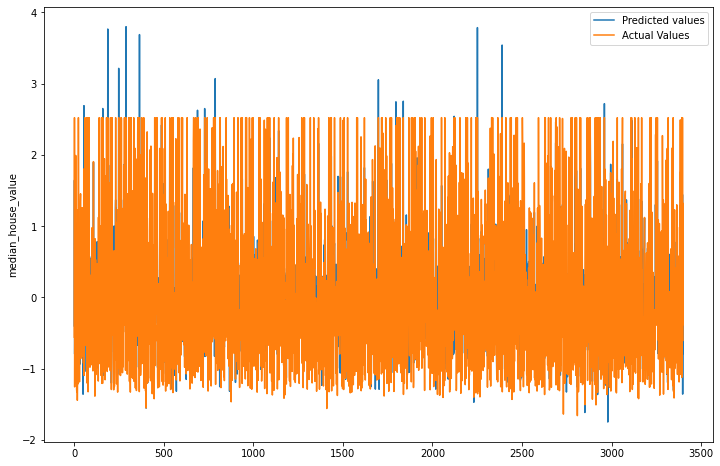

In [20]:
model_performance['ridge_regression'] = model(
   ridge_reg_model,
    'median_house_value',
    ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
    data,
    show_plot_y=True
)

In [21]:
# The elastic net regression

def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5, 
                    normalize=False, max_iter=100000, warm_start=True, equivalent_to="Elastic Net"):

  print("Equivalent to:", equivalent_to)
    
  model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, normalize=normalize, max_iter=max_iter, warm_start=warm_start)
  model.fit(x_train, y_train)

  return model

In [22]:
from functools import partial

Equivalent to: Multiple Linear Regression


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2464.7516779426833, tolerance: 1.3515466557961726
  positive)


The training score for this model is: 63.53%
The test score for this model is: 66.36%


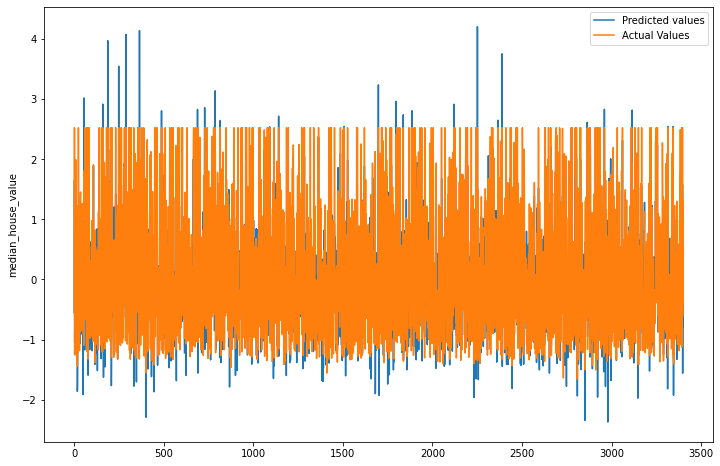

In [23]:
# The elastic net regression equivalent to Multiple linear regression
model_performance['elastic_net_regression_MLR'] = model(partial(elastic_net_reg, alpha=0, equivalent_to="Multiple Linear Regression"),
    'median_house_value',
    ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
    data,
    show_plot_y=True
)

Equivalent to: lasso
The training score for this model is: 48.53%
The test score for this model is: 50.52%


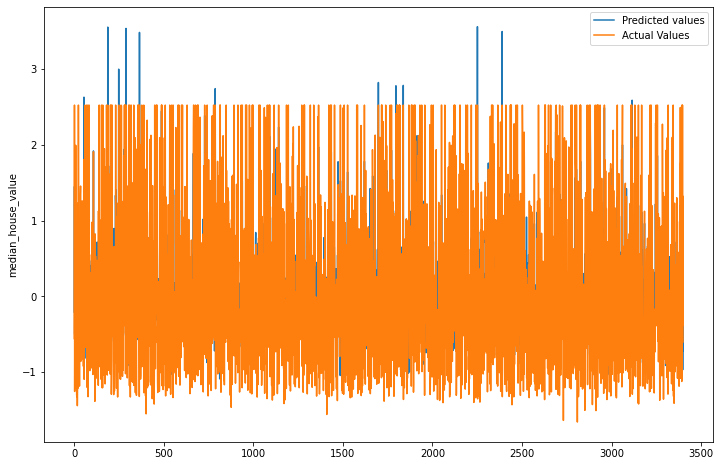

In [24]:
# The elastic net regression equivalent to LASSO regression
model_performance['elastic_net_regression_LASSO'] = model(partial(elastic_net_reg, alpha=0.1, l1_ratio=1, equivalent_to="lasso"),
    'median_house_value',
    ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
    data,
    show_plot_y=True
)

Equivalent to: ridge


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3213.9213317268886, tolerance: 1.3515466557961726
  positive)


The training score for this model is: 59.61%
The test score for this model is: 61.92%


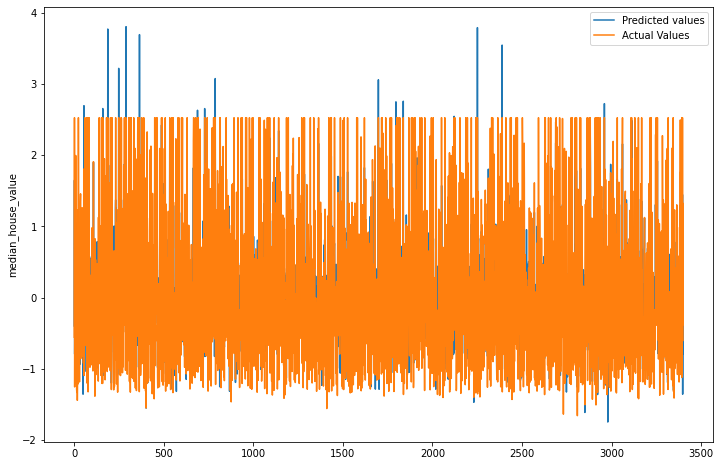

In [25]:
# The elastic net regression equivalent to Ridge regression
model_performance['elastic_net_regression_RIDGE'] = model(partial(elastic_net_reg, alpha=0.1, l1_ratio=0, equivalent_to="ridge"),
    'median_house_value',
    ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
    data,
    show_plot_y=True
)

Equivalent to: ridge_lasso


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3213.9213317268886, tolerance: 1.3515466557961726
  positive)


The training score for this model is: 59.61%
The test score for this model is: 61.92%


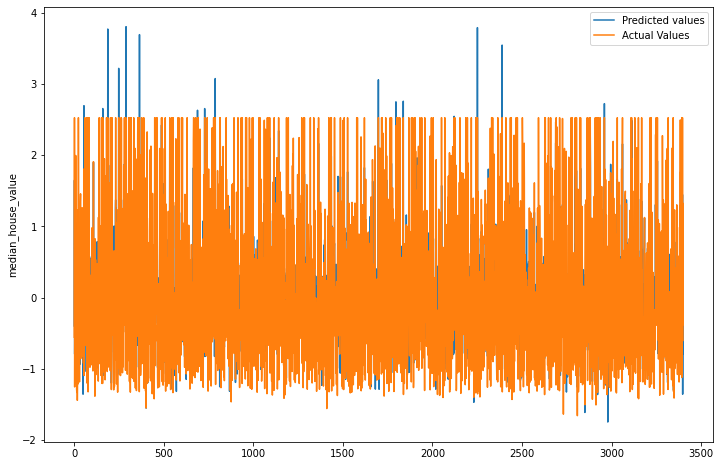

In [26]:
# The elastic net regression equivalent to a middle point between LASSO and Ridge regression
model_performance['elastic_net_regression_RIDGE_LASSO'] = model(partial(elastic_net_reg, alpha=0.1, l1_ratio=0, equivalent_to="ridge_lasso"),
    'median_house_value',
    ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
    data,
    show_plot_y=True
)

In [27]:
# Our compare performance function will show us each ML model with their training and test scores.
compare_performance()

Model type: support_vector_regression
Training score is 62.25 %
Test score is 64.93 %

Model type: multiple_linear_regression
Training score is 63.53 %
Test score is 66.36 %

Model type: lasso_regression
Training score is 48.53 %
Test score is 50.52 %

Model type: ridge_regression
Training score is 59.6 %
Test score is 61.91 %

Model type: elastic_net_regression_MLR
Training score is 63.53 %
Test score is 66.36 %

Model type: elastic_net_regression_LASSO
Training score is 48.53 %
Test score is 50.52 %

Model type: elastic_net_regression_RIDGE
Training score is 59.61 %
Test score is 61.92 %

Model type: elastic_net_regression_RIDGE_LASSO
Training score is 59.61 %
Test score is 61.92 %



# THE END